# Homework Lecture 13:

## Elliptic PDE

Any mass can lead to a gravitational potential in 3-D (x-y-z) space
\begin{equation}
\nabla^2\Phi=4\pi G\rho
\end{equation}
    

We will set G=1 for this problem.  
Please solve the potential of a line mass 
(i.e. one zone at x=50, y=50 with nonzero density and all others with zero density) 
using SOR. Since the problem has symmetry in the Z direction:
\begin{equation}
\nabla^2\Phi=\frac{\partial^2\Phi}{\partial^2 x}+\frac{\partial^2\Phi}{\partial^2y}
\end{equation}


The domain is X from 0 to 100, Y from 0 to 100. $\Delta$x= $\Delta$y=1. (assume $\Phi=0$
at the boundary and $\rho_{50,50}$ is always 1)

### SOR Method

We can discretize the elliptic equation
\begin{equation}
\nabla^2\Phi=4 \pi G \rho
\end{equation}
into
\begin{equation}
\frac{1}{h^2}(\Phi_{i+1,j}+\Phi_{i-1,j}+\Phi_{i,j+1}+\Phi_{i,j-1}-4 \Phi_{i,j})=4 \pi G \rho_{i,j}
\end{equation}

Then we can use neigboring grids to calculate $\Phi_{i,j}$ with
\begin{equation}
du_{i,j}=\frac{1}{4}(\Phi_{i+1,j}+\Phi_{i-1,j}+\Phi_{i,j+1}+\Phi_{i,j-1})-\frac{h^2}{4}4 \pi G \rho_{i,j}-\Phi_{i,j}
\end{equation}
\begin{equation}
\Phi^*_{i,j}=\Phi_{i,j}+\Omega du_{i,j}
\end{equation}

Initializing
0
7.207265914999607
2.7473229114065614
3.2541472929426956
1.8188830008838277
2.2306314690932396
1.509525089455778
1.7185690186918734
1.292604747652227
1.4051852964414806
1.1317193035087314
10
1.1932588804613502
1.0081065526246533
1.0409034406734392
0.9105873235482207
0.9265607418059147
0.8319385590687531
0.8378223467106096
0.767237991243185
0.7669805651557056
0.713003179107659
20
0.7089778726091964
0.666701309413142
0.6603570630447351
0.6264512273301861
0.6186797450124715
0.5908332463583577
0.5821840776766436
0.5587631070230614
0.5495734093482127
0.5294059230237167
30
0.519880584300509
0.5021159690657484
0.4923779736727454
0.47639364641113957
0.46651614967541377
0.4518541216827643
0.4418810373661515
0.42820403671411356
0.4181632753806639
0.40567830684601347
40
0.3973223394251022
0.38757117109460637
0.3796621550244055
0.3709291843310467
0.3634365665456585
0.35546626447887775
0.34836601023987157
0.34101595812087737
0.3342882049846878
0.3274625672396212
50
0.32113419752226946

0.006830372554716746
0.006767352037257979
0.006704914387697158
410
0.006643054182134733
0.006581766047432325
0.00652104466159642
0.006460884752712559
0.006401281098618483
0.0063422285266341305
0.00628372191265214
0.006225756180938902
0.006168326303736649
0.00611142730058134
420
0.006055054237847912
0.005999202228608169
0.005943866431678657
0.0058890420516917175
0.005834724338157571
0.0057809085855353715
0.005727590132323712
0.00567476436098957
0.005622426697286187
0.005570572609954638
430
0.00551919761045383
0.005468297252221532
0.005417867130475429
0.005367902881815212
0.005318400183782046
0.005269354754432243
0.0052207623519962
0.005172618774466287
0.005124919859255783
0.005077661482701501
440
0.0050308395599500955
0.0049844500440769934
0.004938488926555351
0.004892952235735493
0.004847836037910724
0.0048031364354699235
0.004758849567707557
0.004714971609871554
0.0046714987730496205
0.00462842730357238
450
0.004585753483169697
0.004543473628032757
0.004501584088941968
0.0044600812506

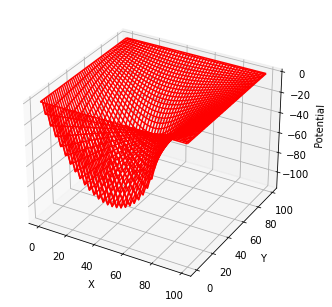

In [3]:
import matplotlib.pylab as plt;
from mpl_toolkits.mplot3d import Axes3D
from numpy import *;
import numpy;
print("Initializing")
omega=1.8
h=1.
Nmax = 100; Niter = 3000; Phi = zeros((Nmax, Nmax), float); p=zeros((Nmax,Nmax),float)   

#set conditions
for k in range(0, 100):  Phi[k,k] = 0.    #Phi is zero at boundary

for s in range(0, 50):  p[s,s] = 1.       #Rho is 1 in middle of grid
    
for iter in range(Niter):                                  
    if iter%10 == 0: print(iter)
    maxerr=0.
    for i in range(1, Nmax-1):                                                
        for j in range(1,Nmax-1): 
            du = 1/4*(Phi[i+1,j]+Phi[i-1,j]+Phi[i,j+1]+Phi[i,j-1])-(h**2 *pi *p[i,j])-Phi[i,j]
            if(maxerr<abs(du)):
                maxerr=abs(du)
            Phi[i,j] = Phi[i,j] + omega*du
    print(maxerr)
    if(maxerr<1.e-3):
        break
            
x = range(0, Nmax, 1)
y = range(0, Nmax, 1)                              
X, Y = plt.meshgrid(x,y)                 

def functz(Phi):                                     
    z = Phi[X,Y]                        
    return z

Z = functz(Phi)                          
fig = plt.figure()                                      
ax = Axes3D(fig)                                      
ax.plot_wireframe(X, Y, Z, color = 'r')               
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potential')
plt.show()                                              

### Please verify that the potential has radial dependence close to 2*G*$\mu$*ln(r)+constant. 

Where $\mu$ is its mass per unit length and r is the distance to the line mass. 

    -Pick any direction in grid.
    -Start from the center (50).
    -Calculate potential along that row
    -Plot 1D profile



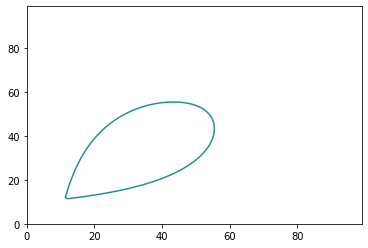

In [20]:
plt.contour(X,Y,Z,1)

I can't figure out how to choose a row and plot it from the center.
But, we can see from the contour plot that the potential (starting at 50) goes down in such a way as to be like ln(r). 